## Description, data exploration and visualisation of Crime Statistics of South Australia

The Data Exploration and visualisation project was undertaken to study in-depth exploration of the crime statistics of South Australia using all the statistical operations and explored my findings using python.
 
### Project Process

- Data understanding and exploration
- Data cleaning
- Data preparation
- Data Visualization
- Interpretation & Conclusion

#### Author = Chukwudi Derek Anyanwu

### 1. Data Understanding and Exploration

Study the dataset and understand the size, attribute names etc.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
# reading the dataset 
crime_stat_SA = pd.read_csv('Crime_Statistics_SA_2014_2019.csv') # Read the CSV into a Dataframe

In [3]:
# shape of the data frame
crime_stat_SA.shape

(385296, 7)

#### Question 1. How many rows and columns exist in this dataset?

There are 385296 rows 7 columns in the dataset.

In [4]:
# displaying the first 5 rows
crime_stat_SA.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence Count
0,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,4.0
1,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,8.0
2,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Assault Police,2.0
3,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,2.0
4,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,4.0


#### Question 2. Are there null values in the dataset ?

In [5]:
crime_stat_SA.isnull().sum()

Reported Date                    0
Suburb - Incident              159
Postcode - Incident            403
Offence Level 1 Description      0
Offence Level 2 Description      0
Offence Level 3 Description      0
Offence Count                    0
dtype: int64

In [6]:
# counting the total of null valuse
crime_stat_SA.isnull().sum().sum() 

562

##### Yes, the null values are 
Suburb - Incident     159

Postcode - Incident   403

Total = 562

#### Question 3.  What are the min and max for column 'Reported Date' ? Does this column have the correct data type? If no, convert it to an appropriate data type.

In [7]:
crime_stat_SA['Reported Date'].min()

'2014-01-01'

In [8]:
crime_stat_SA['Reported Date'].max()

'2019-12-03'

The mininmum reported date is 2014-01-01 and the maximium date is 2019-12-03

In [9]:
# checking the data types of the columns
crime_stat_SA.dtypes

Reported Date                   object
Suburb - Incident               object
Postcode - Incident             object
Offence Level 1 Description     object
Offence Level 2 Description     object
Offence Level 3 Description     object
Offence Count                  float64
dtype: object

It can be seen that the above dataset has Reported Date as an object data type. This will need to be converted to date datatype


In [10]:
# conversion of Object datatype Date datatype
crime_stat_SA['Reported Date'] = pd.to_datetime(crime_stat_SA['Reported Date'],format = '%Y-%m-%d')

### Descriptive statistics

#### Question 4. Calculate the statistics for the "Offence Count" column (Find the count, mean, standard deviation, minimum and maximum).

In [11]:
# summary statistics of the data
crime_stat_SA.describe()

,Offence Count
count,385296.000000
mean,1.164871
std,0.560723
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,28.000000


#### Question 5.   How many unique values does "Offence Level 1 Description" column take?

In [12]:
crime_stat_SA['Offence Level 1 Description'].nunique()

2

#### Question 6.   Display the unique values of level 1 offences.

In [13]:
crime_stat_SA['Offence Level 1 Description'].unique()

array(['OFFENCES AGAINST PROPERTY', 'OFFENCES AGAINST THE PERSON'],
      dtype=object)

#### Question 7.   How many records do contain "offences against the person"?

In [14]:
len(crime_stat_SA.loc[crime_stat_SA['Offence Level 1 Description'] == 'OFFENCES AGAINST THE PERSON'])

86791

There are 86791 records of 'offences against the person'

#### Question 8.   What percentage of the records are "offences against the property"?

In [15]:
count_against_property = len(crime_stat_SA.loc[crime_stat_SA['Offence Level 1 Description'] == 'OFFENCES AGAINST PROPERTY'])
Offence_1_count = len(crime_stat_SA['Offence Level 1 Description'])
against_property_percent = (count_against_property/Offence_1_count) * 100
against_property_percent = np.round(against_property_percent, decimals=2) # round 
against_property_percent

77.47

The percentage of the records that are offences against the property is 77.47 rounded to 2 significant figure

#### Question 9.   How many unique values does "Offence Level 2 Description" column take? 
Display the unique values of level 2 offences together with their counts 
(i.e., how many times they have been repeated).

In [16]:
# displaying the unique Offence Level 2 Description
crime_stat_SA['Offence Level 2 Description'].unique().tolist()

['PROPERTY DAMAGE AND ENVIRONMENTAL',
 'THEFT AND RELATED OFFENCES',
 'ACTS INTENDED TO CAUSE INJURY',
 'ROBBERY AND RELATED OFFENCES',
 'SEXUAL ASSAULT AND RELATED OFFENCES',
 'OTHER OFFENCES AGAINST THE PERSON',
 'SERIOUS CRIMINAL TRESPASS',
 'FRAUD DECEPTION AND RELATED OFFENCES',
 'HOMICIDE AND RELATED OFFENCES']

In [17]:
# count the nique Offence Level 2 Description
crime_stat_SA['Offence Level 2 Description'].nunique()

9

#### Question 10.   How many serious criminal trespasses have occurred with more than 1 offence count?

In [18]:
criminal_trespasses = crime_stat_SA[(crime_stat_SA['Offence Level 2 Description'] == 'SERIOUS CRIMINAL TRESPASS')&( crime_stat_SA['Offence Count']>1)]
criminal_trespasses.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence Count
45,2014-01-01,CLOVELLY PARK,5042,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Residence,2.0
82,2014-01-01,GILLES PLAINS,5086,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Residence,2.0
141,2014-01-01,MANSFIELD PARK,5012,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Residence,2.0
252,2014-01-01,SEATON,5023,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Residence,2.0
427,2014-02-01,MELROSE PARK,5039,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Residence,2.0


#### Question 11.   Investigating the number of crimes per year

In [19]:
# Extracting year from the reported date
crime_stat_SA['Year'] = pd.DatetimeIndex(crime_stat_SA['Reported Date']).year
crime_stat_SA.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence Count,Year
0,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,4.0,2014
1,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,8.0,2014
2,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Assault Police,2.0,2014
3,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,2.0,2014
4,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,4.0,2014


In [20]:
offence_count = crime_stat_SA.groupby('Year')['Offence Count'].sum()
offence_count

Year
2014    101750.0
2015    105656.0
2016    107593.0
2017     50159.0
2018     55758.0
2019     27904.0
Name: Offence Count, dtype: float64

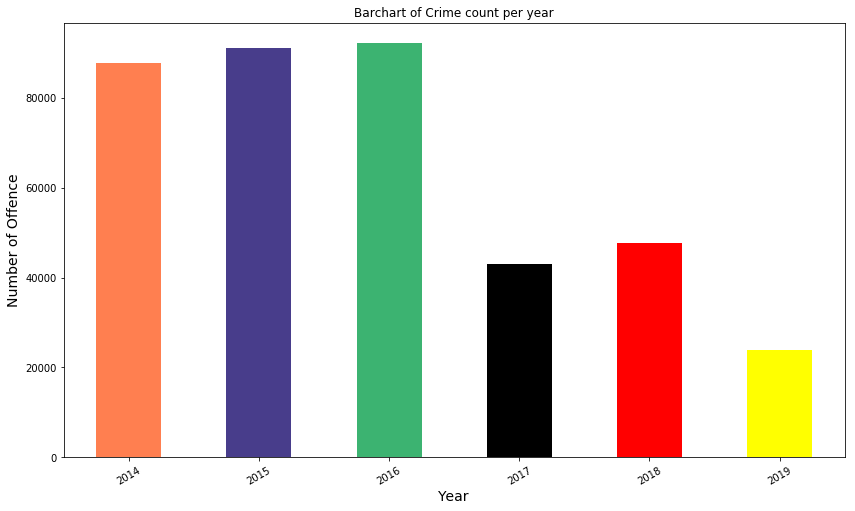

In [21]:
# visualising the number of crimes per year
offence_count = crime_stat_SA.groupby('Year')['Offence Count'].count()
bar_color = ['coral', 'darkslateblue', 'mediumseagreen','black','red', 'yellow']
offence_count.plot(kind='bar', rot = 30, figsize=(14, 8), color= bar_color)
plt.title('Barchart of Crime count per year')
plt.ylabel('Number of Offence', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

It can be observed that crime rose slightly from 2014 to 2016 and a big drop was noticed on 2017. Minimium numbe r of crime was noticed on the chart above and this is because of incomplete data. 

#### Question 12.  Investigating the total number of crimes in different suburbs

In [22]:
# Counting after grouping by Suburb
suburb_offence_count = crime_stat_SA.groupby('Suburb - Incident')['Offence Count'].sum()
suburb_offence_count.head()

Suburb - Incident
ABERFOYLE PARK       1280.0
ADDRESS UNKNOWN        84.0
ADELAIDE            24598.0
ADELAIDE AIRPORT      665.0
AGERY                   5.0
Name: Offence Count, dtype: float64

In [23]:
# creating a dataframe
df = pd.DataFrame(suburb_offence_count)
suburb_offence = df.reset_index()
suburb_offence.head()

,Suburb - Incident,Offence Count
0,ABERFOYLE PARK,1280.0
1,ADDRESS UNKNOWN,84.0
2,ADELAIDE,24598.0
3,ADELAIDE AIRPORT,665.0
4,AGERY,5.0


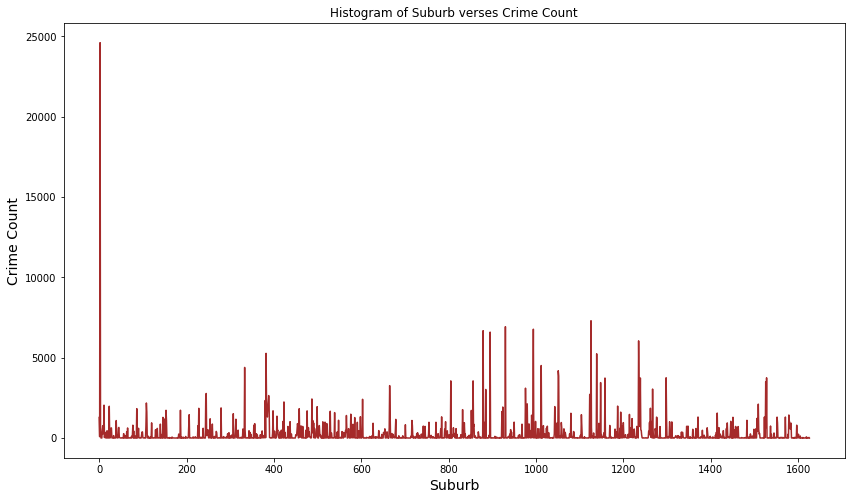

In [24]:
# visualising total crimes versus Suburb
plt.figure(figsize=(14, 8))
plt.plot(suburb_offence['Offence Count'], color = 'brown') # plot
plt.title('Histogram of Suburb verses Crime Count') # add a title to the histogram
plt.ylabel('Crime Count', fontsize=14) # add y-label
plt.xlabel('Suburb', fontsize=14) # add x-label
plt.show()

In [25]:
# creating a dataframe
suburb = pd.DataFrame(crime_stat_SA['Suburb - Incident'])
suburb = suburb.reset_index()
suburb.head()

,index,Suburb - Incident
0,0,ADELAIDE
1,1,ADELAIDE
2,2,ADELAIDE
3,3,ADELAIDE
4,4,ADELAIDE


KeyboardInterrupt: 

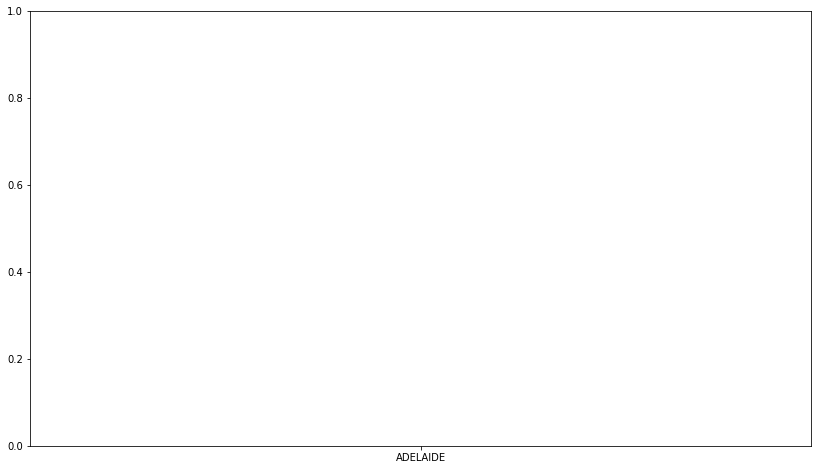

In [26]:
plt.figure(figsize=(14, 8))
suburb['Suburb - Incident'].hist(bins=20, grid=True, xlabelsize=12, ylabelsize=12)
plt.xlabel("Suburb", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xlim(0,10000)               
plt.ylim(0,1600)
plt.show()

In [ ]:
# 
plt.figure(figsize=(14, 8))
suburb_offence_count.hist(bins = 50, xlabelsize=12, ylabelsize=12) # Plot containing the suburb and their total crimes count
plt.title('Histogram of Crime Count', fontsize=15) # add a title to the histogram
plt.ylabel('Crime Count', fontsize=15) # add y-label
plt.xlabel('Suburb', fontsize=15) # add x-label
plt.xlim(0,3500)               
plt.ylim(0,1500)
plt.show()

In [ ]:
suburb_offence_count

In [ ]:
ford['returns'].hist(bins=50)

### 2. Consider the shape of the histogram, what can you tell? 
Compare the mean and median values of the plotted histogram.

The plot has a unimodal data on the left side of the plot which is considered to be an outlier. After further analysis, the outlier data is from Adelaide suburb and further research also support it as Adelaide has the highest population among the other suburb in this study. 
Other than the outlier, the rest of the plot shows a random distribution pattern with several modes (peaks) meaning it has no apparent pattern.
Very high mean and low median was estimated. The Mean here is high because of the high counts of the outliers in this study. Outliers doesn’t affect the median. The mean computed is very high compared to the median.  This study illustrated the big difference between the mean and the median. The mean computed by adding all observations and dividing by the number of observations is been influenced greatly by outliers which can be seen in this case. And the median of 13.0 was estimated because outliers doesn’t influence the median. 


### 3. In which suburbs the total number of crimes are greater than 5000? Plot the total number of crimes in the suburbs with the highest number of crimes (greater than 5000) using a bar chart.

In [ ]:
fun = {'Offence Count':{'Offence Count':'count'}}
groupbyClass = df.groupby('Suburb - Incident').agg(fun).reset_index()  # turn groups into column values
groupbyClass.columns = groupbyClass.columns.droplevel(0)        # drop the top level in column hierarchy
groupbyClass.rename(columns = {'':'Suburb - Incident'}, inplace = True) # rename the first column
Higher_crime  = groupbyClass
Higher_crime = Higher_crime [Higher_crime ['Offence Count']>5000]
Higher_crime 

In [ ]:
bar_color = ['coral', 'darkslateblue', 'mediumseagreen','black','red', 'yellow']
Higher_crime.plot(kind='bar', rot = 0, figsize=(8, 5), color= bar_color)
plt.title('Barchart of Crime count per year')
plt.ylabel('Number of Offence')
plt.xlabel('Suburb')
plt.show()

In [ ]:
df['Day'] = pd.DatetimeIndex(df['Reported Date']).day

### B3. Daily number of crimes

#### For each suburb, calculate the number of days that at least 15 crimes have occurred per day. (Note: your answer should contain all suburbs in the dataset together with a value showing the number of days that at least 15 crimes have happened)

In [ ]:
fun = {'Offence Count':{'Offence Count':'count'}}
groupbyClass = df.groupby(['Day','Suburb - Incident']).agg(fun).reset_index()  # turn groups into column values
groupbyClass.columns = groupbyClass.columns.droplevel(0)        # drop the top level in column hierarchy
groupbyClass.rename(columns = {'':'Suburb - Incident'}, inplace = True) # rename the first column
Higher_crime2 = groupbyClass
# Higher_crime2  = groupbyClass
Higher_crime2 = Higher_crime2[Higher_crime2['Offence Count']>=15]
# Higher_crime2 
Higher_crime2.head()

### 2. Now which suburbs do have at least one day where the daily number of crimes are more than 15. Plot the number of days that at least 15 crimes have occurred for the suburbs you found in this step (step 2) using a bar graph.

In [ ]:
fun = {'Offence Count':{'Offence Count':'sum'}}
groupbyClass = df.groupby(['Reported Date', 'Suburb - Incident']).agg(fun).reset_index()  # turn groups into column values
groupbyClass.columns = groupbyClass.columns.droplevel(0)        # drop the top level in column hierarchy
groupbyClass.rename(columns = {'':'Suburb - Incident'}, inplace = True) # rename the first column
Higher_crime_15  = groupbyClass
Higher_crime_15 = Higher_crime_15[Higher_crime_15['Offence Count']>= 15]
Higher_crime_15 